In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('cleaned_apartments.csv')

In [ ]:
df.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,square_feet,cityname,state,latitude,longitude
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Ele...",2,2,USD,0,0,yes,1920.0,"$1,920",3,Other,GA,34.0648,-84.0849
1,"AC,Cable or Satellite,Clubhouse,Gated,Gym,Inte...",1,1,USD,0,0,yes,973.0,$973,3,Other,LA,32.4544,-93.7135
2,NaN,1,1,USD,0,0,yes,1585.0,"$1,585",1,Los Angeles,CA,34.0372,-118.2972
3,"Cable or Satellite,Clubhouse,Dishwasher,Gated,...",1,1,USD,0,0,yes,950.0,$950,2,Other,TX,27.8689,-97.2057
4,"Parking,Pool,Tennis",1,2,USD,0,0,no,1275.0,"$1,275",3,Other,Other,41.7588,-72.6148


In [ ]:
df=df.drop(columns=['currency','price_display'])

feature engineernig

In [ ]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [ ]:
df['bathrooms'].value_counts()

,count
bathrooms,
1,57597
2,38782
3,3136
4,394
5,237


In [ ]:
df['bathrooms'].value_counts()

,count
bathrooms,
1,57597
2,38782
3,3136
4,394
5,237


In [ ]:
print(sum(df['amenities'].value_counts()>400))

19


In [ ]:
df.head()

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Ele...",2,2,0,0,yes,1920.0,3,Other,GA,34.0648,-84.0849
1,"AC,Cable or Satellite,Clubhouse,Gated,Gym,Inte...",1,1,0,0,yes,973.0,3,Other,LA,32.4544,-93.7135
2,NaN,1,1,0,0,yes,1585.0,1,Los Angeles,CA,34.0372,-118.2972
3,"Cable or Satellite,Clubhouse,Dishwasher,Gated,...",1,1,0,0,yes,950.0,2,Other,TX,27.8689,-97.2057
4,"Parking,Pool,Tennis",1,2,0,0,no,1275.0,3,Other,Other,41.7588,-72.6148


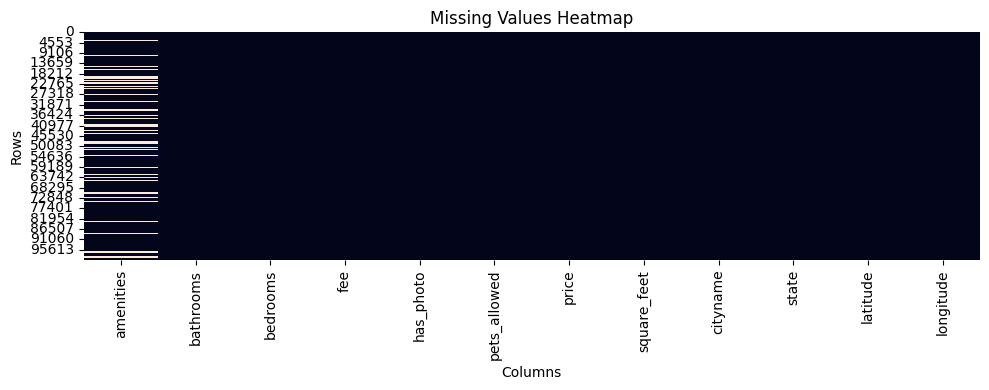

In [ ]:
# Missing values heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()


with targret variable cheaking important features

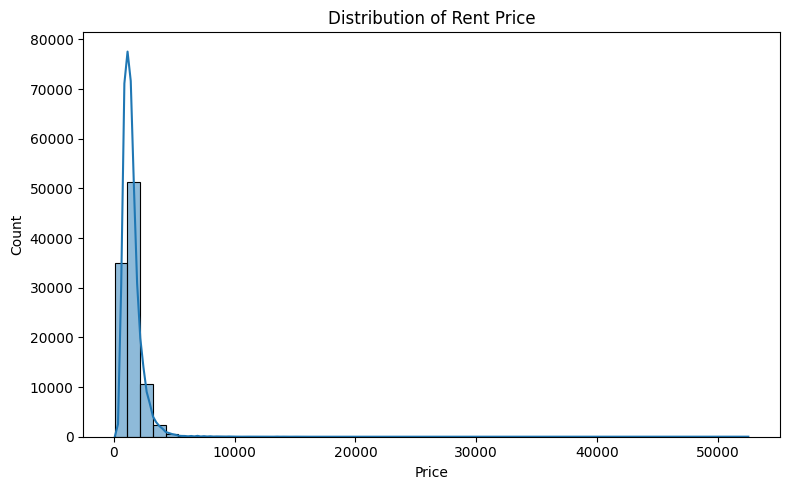

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="price", kde=True, bins=50)
plt.title("Distribution of Rent Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


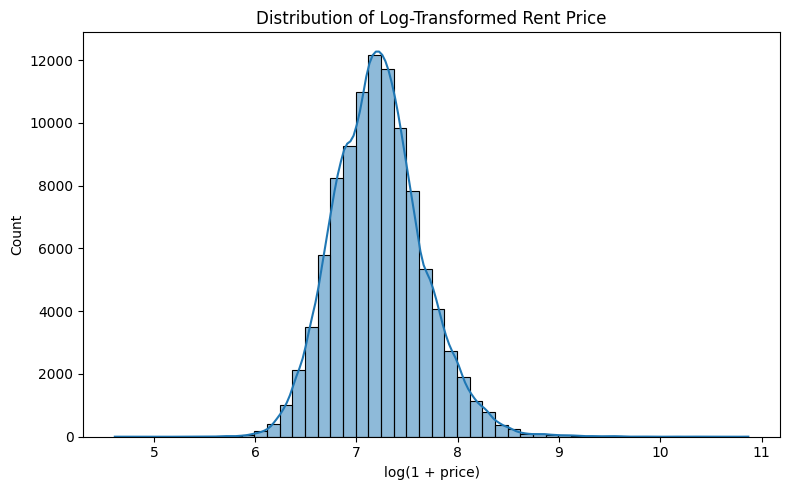

In [ ]:
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="log_price", kde=True, bins=50)
plt.title("Distribution of Log-Transformed Rent Price")
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


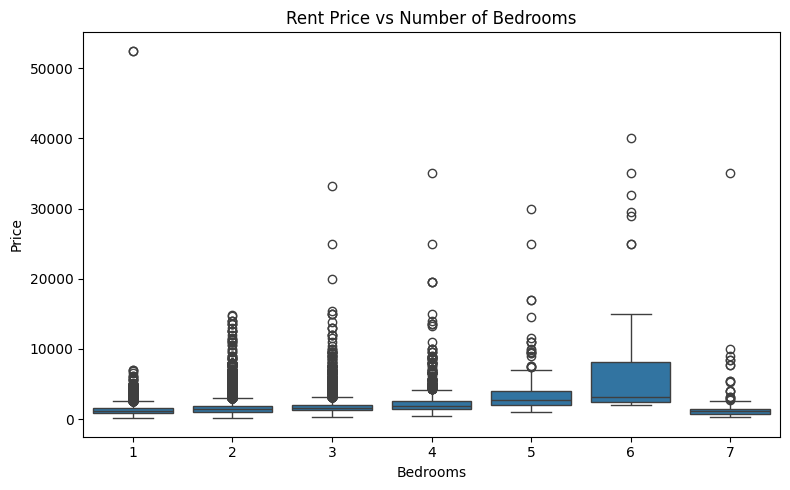

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="bedrooms", y="price")
plt.title("Rent Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


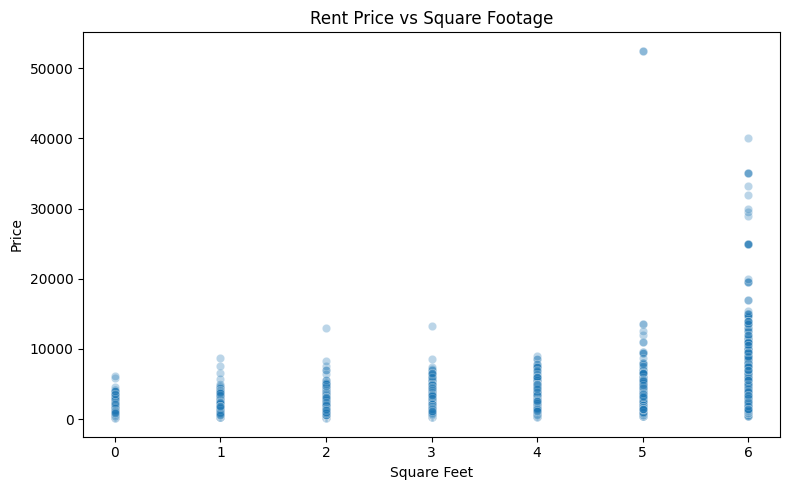

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="square_feet", y="price", alpha=0.3)
plt.title("Rent Price vs Square Footage")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


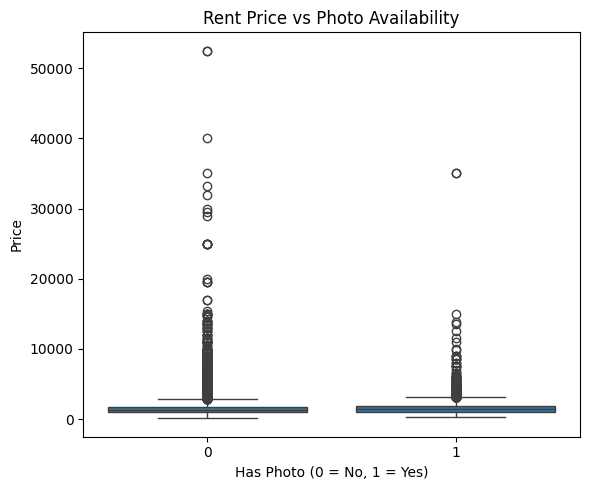

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="has_photo", y="price")
plt.title("Rent Price vs Photo Availability")
plt.xlabel("Has Photo (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


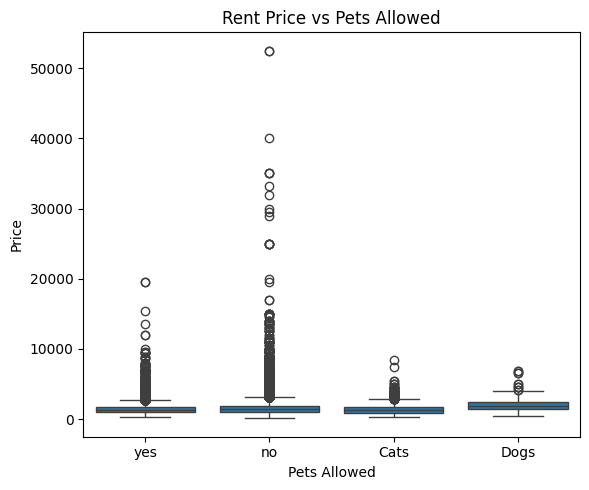

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="pets_allowed", y="price")
plt.title("Rent Price vs Pets Allowed")
plt.xlabel("Pets Allowed")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


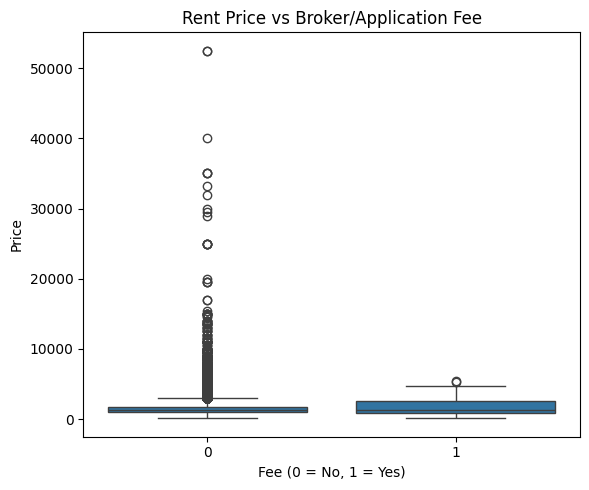

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="fee", y="price")
plt.title("Rent Price vs Broker/Application Fee")
plt.xlabel("Fee (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


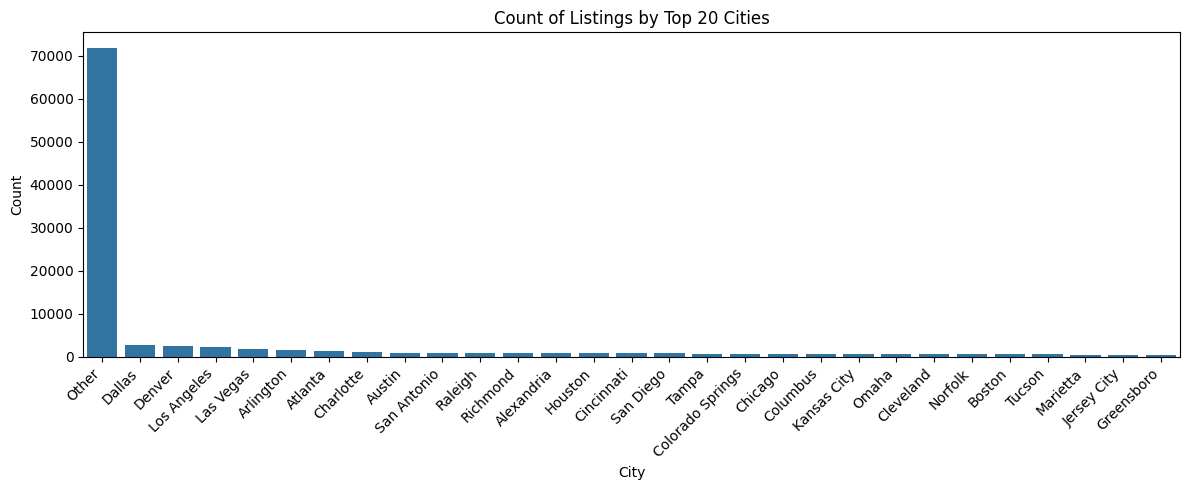

In [ ]:
plt.figure(figsize=(12, 5))
city_order = df["cityname"].value_counts().index

sns.countplot(data=df, x="cityname", order=city_order)
plt.title("Count of Listings by Top 20 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['amenities', 'bathrooms', 'bedrooms', 'fee', 'has_photo',
       'pets_allowed', 'price', 'square_feet', 'cityname', 'state', 'latitude',
       'longitude', 'log_price'],
      dtype='object')

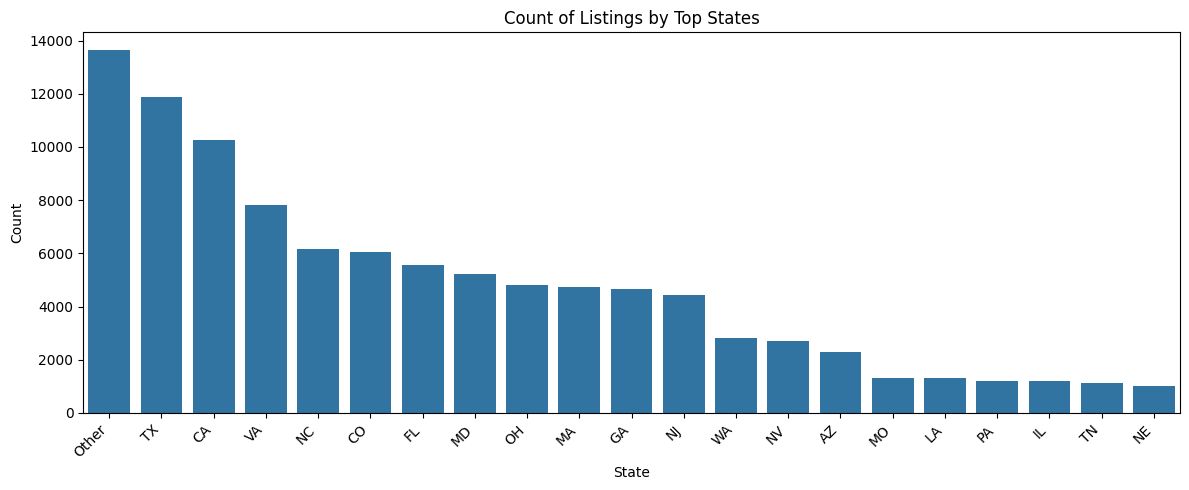

In [ ]:
plt.figure(figsize=(12, 5))
state_order = df["state"].value_counts().index

sns.countplot(data=df, x="state", order=state_order)
plt.title("Count of Listings by Top States")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


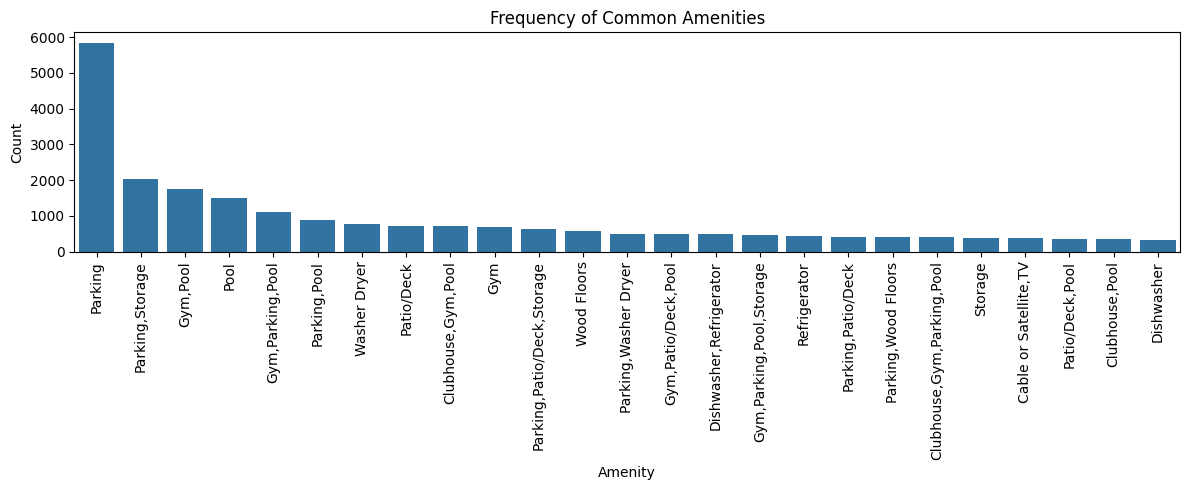

In [ ]:
plt.figure(figsize=(12, 5))
amenity_order = df["amenities"].value_counts().index[:25]

sns.countplot(data=df, x="amenities", order=amenity_order)
plt.title("Frequency of Common Amenities")
plt.xlabel("Amenity")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


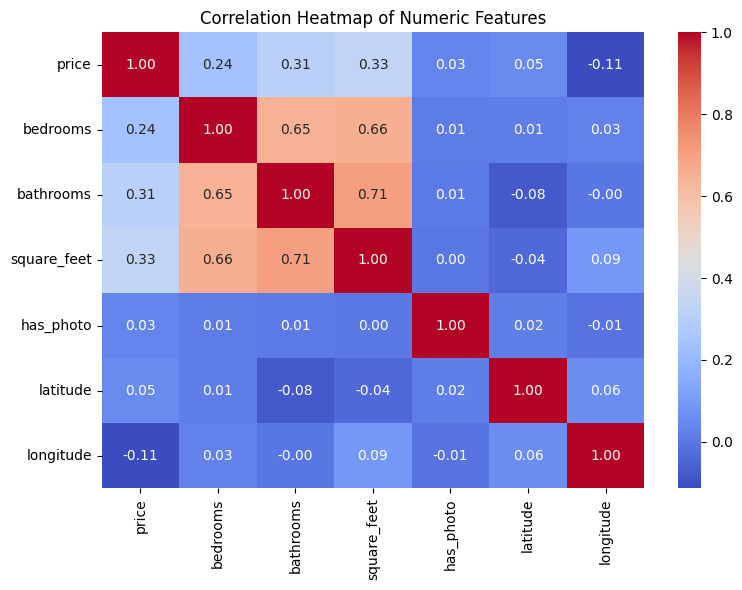

In [ ]:
numeric_cols = ["price", "bedrooms", "bathrooms", "square_feet",
                "has_photo", "latitude", "longitude"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


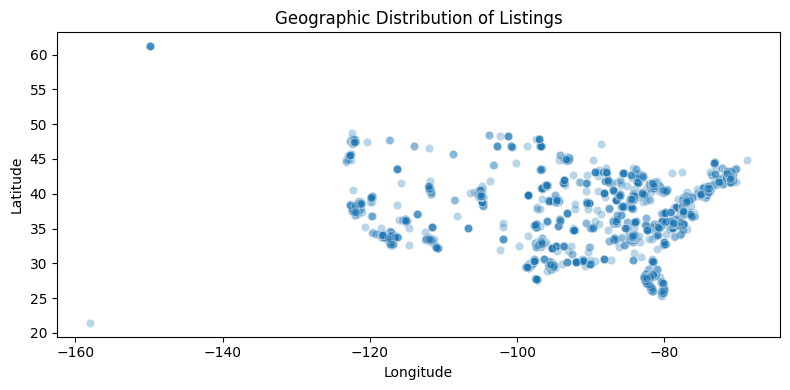

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df.sample(5000, random_state=42), x="longitude", y="latitude", alpha=0.3)
plt.title("Geographic Distribution of Listings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column} IQR bounds:")
    print(f"Lower: {lower_bound}, Upper: {upper_bound}")

    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Removed {len(df) - len(df_clean)} outliers from {column}")
    return df_clean


In [ ]:
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "square_feet")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "price")




price IQR bounds:
Lower: -177.5, Upper: 2962.5
Removed 4797 outliers from price
square_feet IQR bounds:
Lower: 0.5, Upper: 4.5
Removed 13291 outliers from square_feet
price IQR bounds:
Lower: -35.0, Upper: 2677.0
Removed 1658 outliers from price
price IQR bounds:
Lower: -7.5, Upper: 2612.5
Removed 439 outliers from price


In [ ]:

df=df.drop(columns=['log_price'])



In [ ]:

df["bath_bed_ratio"] = df["bathrooms"] / (df["bedrooms"] + 1)
df["total_rooms"] = df["bedrooms"] + df["bathrooms"]
df["has_amenities_flag"] = (df["amenities"] != "Other").astype(int)
df["amenities_count"] = df["amenities"].apply(lambda x: len(str(x).split(",")))
df["bed_sqft_interaction"] = df["bedrooms"] * df["square_feet"]
df["bath_sqft_interaction"] = df["bathrooms"] * df["square_feet"]
df=df.drop(columns=['has_photo','latitude', 'longitude'])


In [ ]:
df['amenities'].value_counts()

,count
amenities,
Parking,4741
"Parking,Storage",1590
"Gym,Pool",1411
Pool,1172
"Gym,Parking,Pool",924
...,...
"AC,Fireplace,Patio/Deck,Pool",1
"AC,Clubhouse,Dishwasher,Garbage Disposal,Gym,Hot Tub,Internet Access,Patio/Deck,Pool,Storage,Washer Dryer,Wood Floors",1
"AC,Cable or Satellite,Clubhouse,Dishwasher,Gated,Gym,Internet Access,Parking,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer",1


In [ ]:
threshold = 400
amenity_counts = df["amenities"].value_counts()
common_amenities = amenity_counts[amenity_counts >= threshold].index
df["amenities"] = df["amenities"].apply(
    lambda x: x if x in common_amenities else "Other"
)



In [ ]:
df['amenities'].isnull().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_cols = ['cityname', 'state', 'amenities']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols)
    ],
    remainder='passthrough'
)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_model_for_pets_allowed_or_not = LabelEncoder()

df['pets_allowed'] = le_model_for_pets_allowed_or_not.fit_transform(df['pets_allowed'])

print("Classes learned:", le_model_for_pets_allowed_or_not.classes_)


Classes learned: ['Cats' 'Dogs' 'no' 'yes']


In [ ]:
X = df.drop(columns=['price'])
y = df['price']

X.shape

(79961, 14)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_cols = ['cityname', 'state', 'amenities']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols)
    ],
    remainder='passthrough'
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipline_model=pipeline.fit(X_train, y_train)
print(pipline_model.score(X_test,y_test))
print(pipline_model.score(X_train,y_train))

0.5118074827076188
0.502549910525206


In [ ]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import numpy as np
y_pred = pipline_model.predict(X_test)
train_pred = pipline_model.predict(X_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(r2,mse,rmse,mae,mape)

0.5118074827076188 106727.51322589637 326.6917709797668 251.01582597677614 20.76097405090437


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=30,
        min_samples_split=6,
        min_samples_leaf=2,
        max_features="sqrt",
        bootstrap=True,
        random_state=32,
        n_jobs=-1
    ))
])
rf_pipeline.fit(X_train, y_train)

print("Train R²:", rf_pipeline.score(X_train, y_train))
print("Test R²:", rf_pipeline.score(X_test, y_test))
y_pred = rf_pipeline.predict(X_test)
train_pred = rf_pipeline.predict(X_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(r2,mse,rmse,mae,mape)


Train R²: 0.61214098240188
Test R²: 0.5789835729435913
0.5789835729435914 92041.6325432355 303.3836392148322 229.3273674301163 19.066996349023736


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    VotingRegressor
)
from sklearn.metrics import r2_score

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=35,
    min_samples_split=6,
    min_samples_leaf=8,
    max_features="sqrt",
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

et = ExtraTreesRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=6,
    max_features="sqrt",
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

voting_ensemble = VotingRegressor(
    estimators=[
        ("rf", rf),
        ("et", et),
        ("gbr", gbr),
    ]
)

ensemble_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", voting_ensemble)
])

ensemble_pipeline.fit(X_train, y_train)

y_train_pred = ensemble_pipeline.predict(X_train)
y_test_pred  = ensemble_pipeline.predict(X_test)

print("Ensemble Train R²:", r2_score(y_train, y_train_pred))
print("Ensemble Test  R²:", r2_score(y_test, y_test_pred))


In [ ]:
y_pred = ensemble_pipeline.predict(X_test)
train_pred = ensemble_pipeline.predict(X_train)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(r2,mse,rmse,mae,mape)

In [ ]:

df_for_model = pd.read_csv("cleaned_apartments.csv")

In [ ]:
df_for_model.head()

In [ ]:
from sklearn.cluster import KMeans
import joblib

kmeans = KMeans(n_clusters=15, random_state=42)

df_for_model["latitude"] = df_for_model["latitude"].fillna(df_for_model["latitude"].mean())
df_for_model["longitude"] = df_for_model["longitude"].fillna(df_for_model["longitude"].mean())

kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(df_for_model[["latitude", "longitude"]])

joblib.dump(kmeans, "geo_cluster_kmeans.pkl")
print("Saved:", "geo_cluster_kmeans.pkl")
print("Fitted?:", hasattr(kmeans, "cluster_centers_"))


df_for_model['pets_allowed']=df_for_model['pets_allowed'].map({"no":0,"yes":1,"Cats":1,"Dogs":1
                                           })
df_for_model['pets_allowed'].value_counts()

df_for_model["geo_cluster"] = kmeans.predict(
    df_for_model[["latitude", "longitude"]]
)




top_amenities = df_for_model['amenities'].value_counts()[df_for_model['amenities'].value_counts() > 400].index
df_for_model['amenities'] = df_for_model['amenities'].apply(
    lambda x: x if x in top_amenities else 'Other'
)

df_for_model=df_for_model

def map_amenity(a):
    a = str(a)

    has_parking = "Parking" in a
    has_gym     = "Gym" in a
    has_pool    = "Pool" in a
    has_laundry = ("Washer" in a) or ("Dryer" in a) or ("Laundry" in a)
    has_storage = "Storage" in a
    if has_parking and (has_gym or has_pool):
        return "Parking + Gym/Pool"
    elif has_parking:
        return "Parking"
    elif has_gym or has_pool:
        return "Gym/Pool"
    elif has_laundry:
        return "Laundry"
    elif has_storage:
        return "Storage"
    else:
        return "Other"
df_for_model["amenity_group"] = df_for_model["amenities"].apply(map_amenity)



df=df_for_model

In [ ]:
#
df=df.drop(columns=['price_display','currency'])
df.isnull().sum()
# ['amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo','geo_cluster']

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

balance_cols = [
    'amenities',

]

df_seq = df.copy()

df_seq['amenities'] = df_seq['amenities'].fillna('Other')
df_seq['has_photo'] = df_seq['has_photo'].fillna(0)


top_amenities = df_seq['amenities'].value_counts()
keep = top_amenities[top_amenities > 300].index
df_seq['amenities'] = df_seq['amenities'].where(
    df_seq['amenities'].isin(keep), 'Other'
)

def balance_one_column(df, col):
    X = df.drop(columns=[col])
    y = df[col]

    ros = RandomOverSampler(random_state=42)
    X_over, y_over = ros.fit_resample(X, y)

    df_out = X_over.copy()
    df_out[col] = y_over
    return df_out

for col in balance_cols:
    print(f"Balancing: {col}")
    print("Before:\n", df_seq[col].value_counts().head())

    df_seq = balance_one_column(df_seq, col)

    print("After:\n", df_seq[col].value_counts().head())
    print("-" * 40)

df_final = df_seq
print("Final shape:", df_final.shape)


In [ ]:

from imblearn.over_sampling import RandomOverSampler
import pandas as pd

balance_cols = [
    'state',

]

df_seq = df_final.copy()

def balance_one_column(df, col):
    X = df.drop(columns=[col])
    y = df[col]

    ros = RandomOverSampler(random_state=42)
    X_over, y_over = ros.fit_resample(X, y)

    df_out = X_over.copy()
    df_out[col] = y_over
    return df_out

for col in balance_cols:
    print(f"Balancing: {col}")
    print("Before:\n", df_seq[col].value_counts().head())

    df_seq = balance_one_column(df_seq, col)

    print("After:\n", df_seq[col].value_counts().head())
    print("-" * 40)

df_for_model = df_seq
print("Final shape:", df_for_model.shape)

Balancing: state
Before:
 state
Other    243909
CA       233475
TX       219919
VA       151446
OH       117788
Name: count, dtype: int64
After:
 state
GA       243909
LA       243909
CA       243909
TX       243909
Other    243909
Name: count, dtype: int64
----------------------------------------
Final shape: (5122089, 14)


In [ ]:
df_for_model["bath_bed_ratio"] = df_for_model["bathrooms"] / (df_for_model["bedrooms"] + 1)
df_for_model["total_rooms"] = df_for_model["bedrooms"] + df_for_model["bathrooms"]
df_for_model["bed_sqft_interaction"] = df_for_model["bedrooms"] * df["square_feet"]
df_for_model["bath_sqft_interaction"] = df_for_model["bathrooms"] * df["square_feet"]
# df_for_model=df_for_model.drop(columns=['amenities','bathrooms','bedrooms'])

In [ ]:
sns.pairplot(df_for_model)
plt.show()

In [ ]:
df=df_for_model

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column} IQR bounds:")
    print(f"Lower: {lower_bound}, Upper: {upper_bound}")

    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Removed {len(df) - len(df_clean)} outliers from {column}")
    return df_clean


df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "longitude")
df = remove_outliers_iqr(df, "square_feet")
df = remove_outliers_iqr(df, "latitude")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "square_feet")
df = remove_outliers_iqr(df, "latitude")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "square_feet")
df = remove_outliers_iqr(df, "latitude")
df = remove_outliers_iqr(df, "price")

# sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import numpy as np

df["log_price"] = np.log1p(df["price"])

target_col = "log_price"

feature_cols = [
    "fee",
    "has_photo",
    "pets_allowed",
    "cityname",
    "state",
    "geo_cluster",
    "amenity_group",
    "bath_bed_ratio",
    "total_rooms",
    "bed_sqft_interaction",
    "bath_sqft_interaction",
    "longitude",
    "square_feet",
    "latitude",
    "bathrooms",
    "bedrooms",
]

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
onehot_cols = ['cityname', 'state', 'amenity_group']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols)
    ],
    remainder='passthrough'
)

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=400,
        max_depth=14,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=32,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

y_pred = rf_pipeline.predict(X_test)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RandomForest R²:    {r2:.4f}")
print(f"RandomForest MAE:   {mae:.2f}")
print(f"RandomForest MSE:   {mse:.2f}")
print(f"RandomForest RMSE:  {rmse:.2f}")
print(f"RandomForest MAPE:  {mape:.2%}")


In [ ]:

y_pred_log = rf_pipeline.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2  = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"RandomForest REAL R²:   {r2:.4f}")
print(f"RandomForest REAL MAE:  ${mae:.2f}")
print(f"RandomForest REAL RMSE: ${rmse:.2f}")
print(f"RandomForest REAL MAPE: {mape:.2f}%")



In [ ]:

print(rf_pipeline.score(X_train, y_train))
print(rf_pipeline.score(X_test, y_test))

In [ ]:
pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from catboost import CatBoostRegressor, Pool
df["log_price"] = np.log1p(df["price"])

target_col = "log_price"
feature_cols = [
    "fee",
    "has_photo",
    "pets_allowed",
    "cityname",
    "state",
    "geo_cluster",
    "amenity_group",
    "bath_bed_ratio",
    "total_rooms",
    "bed_sqft_interaction",
    "bath_sqft_interaction",
    "longitude",
    "square_feet",
    "latitude",
    "bathrooms",
    "bedrooms",
]

X = df[feature_cols]
y = df[target_col]
onehot_cols = ['cityname', 'state', 'amenity_group']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols)
    ],
    remainder='passthrough'
)

cat_features = ["cityname", "state", "geo_cluster", "amenity_group"]

cat_feature_indices = [X.columns.get_loc(col) for col in cat_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_feature_indices)
cat_model = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    depth=8,
    learning_rate=0.05,
    iterations=2000,
    l2_leaf_reg=3.0,
    random_seed=42,
    od_type="Iter",
    od_wait=100,
    verbose=200
)

cat_model.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True
)
y_pred = cat_model.predict(X_test)

r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

print(f"CatBoost R²:   {r2:.4f}")
print(f"CatBoost MAE:  {mae:.2f}")
print(f"CatBoost MSE:  {mse:.2f}")
print(f"CatBoost RMSE: {rmse:.2f}")
print(f"CatBoost MAPE: {mape:.2f}%")


In [ ]:
y_pred_log = cat_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

y_true = np.expm1(y_test)


In [ ]:
r2  = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("CatBoost R²:", r2)
print("CatBoost MAE:", mae)
print("CatBoost RMSE:", rmse)
print("CatBoost MAPE:", mape)


In [ ]:
print(cat_model.score(X_train, y_train))
print(cat_model.score(X_test, y_test))

In [ ]:

cat_model.save_model(
    "catboost_price_model.pkl",
    format="cbm"
)


In [ ]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)
import numpy as np

y_train_log = cat_model.predict(X_train)
y_train_pred = np.expm1(y_train_log)
y_train_true = np.expm1(y_train)

r2_train   = r2_score(y_train_true, y_train_pred)
mae_train  = mean_absolute_error(y_train_true, y_train_pred)
mse_train  = mean_squared_error(y_train_true, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_true, y_train_pred)


y_test_log = cat_model.predict(X_test)
y_test_pred = np.expm1(y_test_log)
y_test_true = np.expm1(y_test)

r2_test   = r2_score(y_test_true, y_test_pred)
mae_test  = mean_absolute_error(y_test_true, y_test_pred)
mse_test  = mean_squared_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred)

print("Training Scores:")
print(f"R²:   {r2_train:.4f}")
print(f"MAE:  {mae_train:.2f}")
print(f"MSE:  {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAPE: {mape_train:.2%}")

print("\nTest Scores:")
print(f"R²:   {r2_test:.4f}")
print(f"MAE:  {mae_test:.2f}")
print(f"MSE:  {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAPE: {mape_test:.2%}")

In [ ]:
target_col = "log_price"
feature_cols = [
    "fee",
    "has_photo",
    "pets_allowed",
    "cityname",
    "state",
    "geo_cluster",
    "amenity_group",
    "bath_bed_ratio",
    "total_rooms",
    "bed_sqft_interaction",
    "bath_sqft_interaction",
    "longitude",
    "square_feet",
    "latitude",
]

X = df[feature_cols]
y = df[target_col]

In [ ]:
cat_features = ["cityname", "state", "geo_cluster", "amenity_group"]

cat_feature_indices = [X.columns.get_loc(col) for col in cat_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from catboost import CatBoostRegressor

target_col = "log_price"
feature_cols = [
    "fee", "has_photo", "pets_allowed", "cityname", "state", "geo_cluster",
    "amenity_group", "bath_bed_ratio", "total_rooms", "bed_sqft_interaction",
    "bath_sqft_interaction", "longitude", "square_feet", "latitude",
]

X = df[feature_cols].copy()
y = df[target_col].copy()

cat_cols = ["cityname", "state", "geo_cluster", "amenity_group"]
num_cols = [c for c in feature_cols if c not in cat_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop"
)

lr_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=14,
        min_samples_split=6,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=32,
        n_jobs=-1
    ))
])

cat_pipe = Pipeline(steps=[
    ("model", CatBoostRegressor(
        loss_function="RMSE",
        eval_metric="RMSE",
        depth=8,
        learning_rate=0.05,
        iterations=2000,
        l2_leaf_reg=3.0,
        random_seed=42,
        od_type="Iter",
        od_wait=100,
        verbose=200,
        cat_features=cat_cols
    ))
])

voting_reg = VotingRegressor(
    estimators=[
        ("lr", lr_pipe),
        ("rf", rf_pipe),
        ("cat", cat_pipe)
    ],
    weights=[1, 2, 3]
)

voting_reg.fit(X_train, y_train)

y_pred = voting_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("VotingRegressor (Avg) Test R²:", r2)
print("VotingRegressor (Avg) MAE:", mae)
print("VotingRegressor (Avg) RMSE:", rmse)


In [ ]:
import tensorflow as tf
target_col = "log_price"

feature_cols = [
    "fee", "has_photo", "pets_allowed", "bath_bed_ratio",
    "total_rooms", "bed_sqft_interaction", "bath_sqft_interaction",
    "longitude", "latitude", "square_feet"
]

X = df[feature_cols].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mse"
)

model.summary()


In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_rnn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


In [ ]:
y_pred = model.predict(X_test_rnn).flatten()

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RNN Test R²:", r2)
print("RNN MAE:", mae)
print("RNN RMSE:", rmse)


In [ ]:
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred)

mae_real = mean_absolute_error(y_test_real, y_pred_real)
rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print("RNN REAL MAE:", mae_real)
print("RNN REAL RMSE:", rmse_real)


In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
target_col = "log_price"

feature_cols = [
    "fee", "has_photo", "pets_allowed",
    "bath_bed_ratio", "total_rooms",
    "bed_sqft_interaction", "bath_sqft_interaction",
    "longitude", "latitude", "square_feet"
]

X = df[feature_cols].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model = Sequential([

    SimpleRNN(
        32,
        return_sequences=True,
        kernel_regularizer=l2(0.001),
        input_shape=(X_train_rnn.shape[1], 1)
    ),
    BatchNormalization(),
    Dropout(0.3),

    SimpleRNN(
        16,
        kernel_regularizer=l2(0.001)
    ),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation="relu"),
    Dropout(0.2),

    Dense(1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse"
)

model.summary()


In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_rnn,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


In [ ]:
y_pred = model.predict(X_test_rnn).flatten()

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RNN R²:", r2)
print("RNN MAE:", mae)
print("RNN RMSE:", rmse)
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred)

print("RNN REAL MAE:", mean_absolute_error(y_test_real, y_pred_real))
print("RNN REAL RMSE:", np.sqrt(mean_squared_error(y_test_real, y_pred_real)))


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

target_col = "log_price"

cat_cols = ["cityname", "state", "geo_cluster", "amenity_group"]
num_cols = [
    "fee", "has_photo", "pets_allowed",
    "bath_bed_ratio", "total_rooms",
    "bed_sqft_interaction", "bath_sqft_interaction",
    "longitude", "latitude", "square_feet"
]

X = df[cat_cols + num_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols)
    ],
    remainder="drop"
)

pca_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95, svd_solver="full")),
    ("model", CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    depth=8,
    learning_rate=0.05,
    iterations=2000,
    l2_leaf_reg=3.0,
    random_seed=42,
    od_type="Iter",
    od_wait=100,
    verbose=200
))
])

pca_pipeline.fit(X_train, y_train)

y_pred = pca_pipeline.predict(X_test)
print("Test R² with PCA:", r2_score(y_test, y_pred))

pca_step = pca_pipeline.named_steps["pca"]
print("Number of PCA components:", pca_step.n_components_)
print("Variance retained:", pca_step.explained_variance_ratio_.sum())


In [ ]:
y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_real = mean_absolute_error(y_test_real, y_pred_real)
rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print("REAL MAE:", mae_real)
print("REAL RMSE:", rmse_real)


In [ ]:
print(pca_pipeline.score(X_train, y_train))
print(pca_pipeline.score(X_test, y_test))

In [ ]:
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred)

mae_real = mean_absolute_error(y_test_real, y_pred_real)
rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print("SVR REAL MAE:", mae_real)
print("SVR REAL RMSE:", rmse_real)


In [ ]:
from sklearn.decomposition import PCA

svr_pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("svr", SVR(kernel="rbf", C=10, epsilon=0.1))
])

svr_pca_pipeline.fit(X_train, y_train)
y_pred_pca = svr_pca_pipeline.predict(X_test)

print("SVR+PCA R²:", r2_score(y_test, y_pred_pca))


In [ ]:
print(svr_pca_pipeline.score(X_train, y_train))
print(svr_pca_pipeline.score(X_test, y_test))


In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from catboost import CatBoostRegressor, Pool
df["log_price"] = np.log1p(df["price"])

target_col = "log_price"
feature_cols = [

    "cityname",
    "state",
    "geo_cluster",
    "amenity_group",
    "bath_bed_ratio",
    "total_rooms",
    "bed_sqft_interaction",
    "bath_sqft_interaction",
    "longitude",
    "square_feet",
    "latitude",
]

X = df[feature_cols]
y = df[target_col]
onehot_cols = ['cityname', 'state', 'amenity_group']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols)
    ],
    remainder='passthrough'
)

cat_features = ["cityname", "state", "geo_cluster", "amenity_group"]

cat_feature_indices = [X.columns.get_loc(col) for col in cat_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_feature_indices)
cat_model = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    depth=8,
    learning_rate=0.05,
    iterations=2000,
    l2_leaf_reg=3.0,
    random_seed=42,
    od_type="Iter",
    od_wait=100,
    verbose=200
)

cat_model.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True
)
y_pred = cat_model.predict(X_test)

r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

print(f"CatBoost R²:   {r2:.4f}")
print(f"CatBoost MAE:  {mae:.2f}")
print(f"CatBoost MSE:  {mse:.2f}")
print(f"CatBoost RMSE: {rmse:.2f}")
print(f"CatBoost MAPE: {mape:.2f}%")


In [ ]:
y_pred_log = cat_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

y_true = np.expm1(y_test)



In [ ]:
r2  = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("CatBoost R²:", r2)
print("CatBoost MAE:", mae)
print("CatBoost RMSE:", rmse)
print("CatBoost MAPE:", mape)


In [ ]:
print(cat_model.score(X_train, y_train))
print(cat_model.score(X_test, y_test) )

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

target_col = "log_price"

cat_cols = ["cityname", "state", "geo_cluster", "amenity_group"]
num_cols = [
    "bath_bed_ratio", "total_rooms",
    "bed_sqft_interaction", "bath_sqft_interaction",
    "longitude", "square_feet", "latitude"
]

X = df[cat_cols + num_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
preprocessor_svr = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ],
    remainder="drop"
)

svr_pipeline = Pipeline([
    ("preprocessor", preprocessor_svr),
    ("svr", SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"))
])

svr_pipeline.fit(X_train, y_train)
y_pred = svr_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("SVR R²:", r2)
print("SVR MAE:", mae)
print("SVR RMSE:", rmse)



In [ ]:
target_col = "price"
cat_cols = ["cityname", "state", "geo_cluster", "amenity_group"]
num_cols = [
    "bath_bed_ratio", "total_rooms",
    "bed_sqft_interaction", "bath_sqft_interaction",
    "longitude", "latitude", "square_feet"
]

X = df[cat_cols + num_cols]
y = df[[target_col]]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.preprocessing import StandardScaler

y_scaler = StandardScaler()

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)
svr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svr", SVR(
        kernel="rbf",
        C=10.0,
        epsilon=0.1,
        gamma="scale"
    ))
])
svr_pipeline.fit(X_train, y_train_scaled.ravel())


In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_scaled = svr_pipeline.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_real = y_test.values


In [ ]:
r2 = r2_score(y_test_real, y_pred)
mae = mean_absolute_error(y_test_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))

print("SVR REAL R²:", r2)
print("SVR REAL MAE:", mae)
print("SVR REAL RMSE:", rmse)
